# 딥러닝 구조 연습2

## 라이브러리 로드

In [1]:
import pandas as pd
import tensorflow as tf

# 딥러닝을 구동하는 데 필요한 케라스 함수를 불러옵니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## 데이터 로드

In [23]:
df = pd.read_csv('./data/diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 데이터 준비

In [24]:
X_train =df.drop(['Outcome'], axis=1)
y_train =df['Outcome']

In [15]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [16]:
type(X_train),type(y_train)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [17]:
X_train.ndim

2

In [18]:
X_train.shape

(768, 8)

In [ ]:
# 다른 방식
X_train = df.values[:,0:-1]
y_train = df['Outcome']

## 딥러닝 구성하기

http://alexlenail.me/NN-SVG/index.html
아키텍처를 8,12,1로 설정 :  8개피처 12개 유닛-> 결국에는 1개의 레이어로 귀결해 0,1로 결과 도출
하나하나를 통과할때 활성화함수relu를 거치며 선형이 비선형으로 바뀌면서 결과로 모여진다.

피처수는 표를 보고 읽어준 값. 
유닛수는 임의로 정한것. 최적값을 찾아냄

In [25]:
# 모델을 설정합니다.
model = Sequential()
model.add(Dense(12, input_shape=(8,), activation = 'relu')) 
# 12개의 유닛, 들어갈 때 input_shape이 피처 8개인 벡터로 들어간다고 지정, 액티베이션 활성화함수 relu
model.add(Dense(1,activation='sigmoid')) # 모델을 만드는 목적 : 이진분류 => 출력층
# 분류이기에 0,1(이진분류) => 당뇨병이다, 아니다로 분류할것.
# 최종적으로는 unit 1개에 활성화함수는 시그모이드함수로. => 모델을 만드는 목적(이진분류)

In [ ]:
# 당뇨병요소들을 피처로 해서 -> 그결과 당뇨병이다 아니다를 레이블
# 이후 관측치가 예측치로 들어가면 당뇨병이다 아니다를 판별해주는 딥러닝 서비스

In [26]:
model.summary() # 12개 -> 1개. 파라미터 w가중치. 
# 선 하나하나에 활성화함수가 있음.8x12 + 12 = 108개

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 12)                108       
                                                                 
 dense_3 (Dense)             (None, 1)                 13        
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


## 딥러닝 설정하기

In [27]:
# 모델을 컴파일합니다.
# 이진분류 loss: binary_crossentropy
# 이진분류니까 평가는 Accuracy
model.compile(loss='binary_crossentropy' , optimizer='adam', metrics=['Accuracy'])

In [ ]:
# 분류/ 예측(회귀)에 따라 
# 분류는 loss 회귀는 MSE를 설정
# 해당 케이스는 loss='binary_crossentropy'로 이진분류 설정

# ot: Adam을 그냥 쓰면 언더피팅이 되기도 함.
#학습률을 0.5로 재설정을 할수도. 0.5라는 숫자는 경험치.

## 딥러닝 훈련하기

In [29]:
X_train.shape

(768, 8)

In [30]:
# 모델을 실행합니다.
epoch_hist = model.fit(X_train, y_train, epochs=200)


Epoch 1/200
24/24 [==============================] - 0s 804us/step - loss: 15.4600 - Accuracy: 0.5156
Epoch 2/200
24/24 [==============================] - 0s 870us/step - loss: 11.0226 - Accuracy: 0.5820
Epoch 3/200
24/24 [==============================] - 0s 804us/step - loss: 7.8456 - Accuracy: 0.6055
Epoch 4/200
24/24 [==============================] - 0s 957us/step - loss: 5.1968 - Accuracy: 0.6068
Epoch 5/200
24/24 [==============================] - 0s 891us/step - loss: 3.7891 - Accuracy: 0.6328
Epoch 6/200
24/24 [==============================] - 0s 1ms/step - loss: 3.2519 - Accuracy: 0.6185
Epoch 7/200
24/24 [==============================] - 0s 783us/step - loss: 2.9140 - Accuracy: 0.6276
Epoch 8/200
24/24 [==============================] - 0s 1ms/step - loss: 2.6065 - Accuracy: 0.6250
Epoch 9/200
24/24 [==============================] - 0s 891us/step - loss: 2.3220 - Accuracy: 0.6289
Epoch 10/200
24/24 [==============================] - 0s 1ms/step - loss: 2.1088 - Accuracy: 

## 평가하기

In [31]:
# 결과를 출력합니다.
model.evaluate(X_train, y_train) # 로스, 정확도

24/24 [==============================] - 0s 674us/step - loss: 0.5228 - Accuracy: 0.7487


[0.522769033908844, 0.7486979365348816]

In [32]:
model.evaluate(X_train, y_train)[1] # 정확도만 추출

24/24 [==============================] - 0s 696us/step - loss: 0.5228 - Accuracy: 0.7487


0.7486979365348816

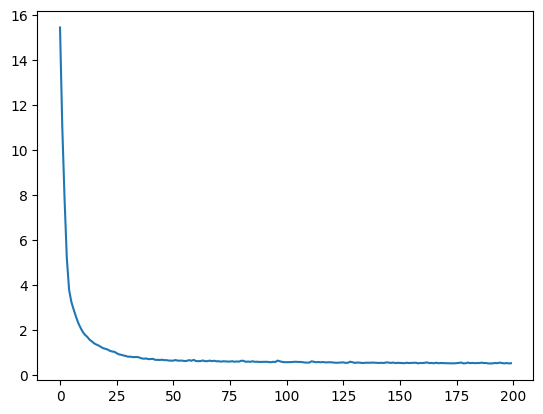

In [34]:
import matplotlib.pyplot as plt
plt.plot(epoch_hist.history['loss'])
plt.show()

In [ ]:
# 에포크 수는 시각화 해 본 후 적절하게

## 전체 코드

Epoch 1/200
24/24 [==============================] - 0s 696us/step - loss: 7.5436 - Accuracy: 0.4466
Epoch 2/200
24/24 [==============================] - 0s 804us/step - loss: 6.1406 - Accuracy: 0.4375
Epoch 3/200
24/24 [==============================] - 0s 783us/step - loss: 5.1177 - Accuracy: 0.4544
Epoch 4/200
24/24 [==============================] - 0s 739us/step - loss: 4.2679 - Accuracy: 0.4688
Epoch 5/200
24/24 [==============================] - 0s 870us/step - loss: 3.5228 - Accuracy: 0.4987
Epoch 6/200
24/24 [==============================] - 0s 696us/step - loss: 2.9536 - Accuracy: 0.5104
Epoch 7/200
24/24 [==============================] - 0s 804us/step - loss: 2.3557 - Accuracy: 0.5169
Epoch 8/200
24/24 [==============================] - 0s 761us/step - loss: 1.8768 - Accuracy: 0.5586
Epoch 9/200
24/24 [==============================] - 0s 826us/step - loss: 1.4796 - Accuracy: 0.5729
Epoch 10/200
24/24 [==============================] - 0s 826us/step - loss: 1.2510 - Accura

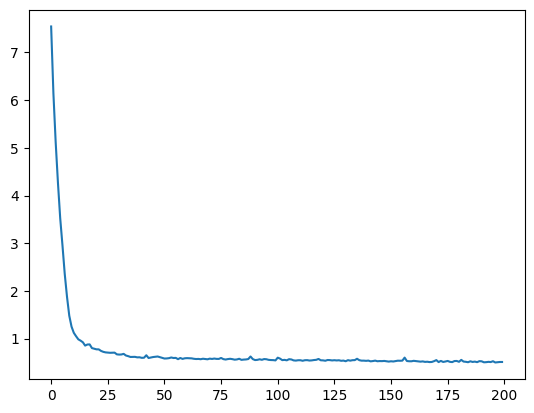

In [47]:
import pandas as pd
import tensorflow as tf
# 딥러닝을 구동하는 데 필요한 케라스 함수를 불러옵니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 데이터 로드
df = pd.read_csv('./data/diabetes.csv')
# 데이터 준비
X_train =df.drop(['Outcome'], axis=1)
y_train =df['Outcome']

# 모델 설정
model = Sequential()
model.add(Dense(12, input_shape=(8,), activation = 'relu')) 
model.add(Dense(1,activation='sigmoid'))
# model.summary()

# 딥러닝 설정
model.compile(loss='binary_crossentropy' , optimizer='adam', metrics=['Accuracy'])


# 모델을 실행 (딥러닝 훈련)
epoch_hist = model.fit(X_train, y_train, epochs=200)

# 평가
model.evaluate(X_train, y_train) # 로스, 정확도

#  추가로 시각화
import matplotlib.pyplot as plt
plt.plot(epoch_hist.history['loss'])
plt.show()

## 실험

아래의 파라미터를 조정해보며 네트워크의 구성과 성능을 살펴봅시다. 
* Dense층의 유닛개수를 조정해 봅시다. 
* Dense층을 더 넣어 봅시다. 
* epoch수와 batch_size를 조정해 봅시다.

In [ ]:
# 덴스층 추가

Epoch 1/200
24/24 [==============================] - 0s 826us/step - loss: 30.6128 - Accuracy: 0.3568
Epoch 2/200
24/24 [==============================] - 0s 804us/step - loss: 12.0309 - Accuracy: 0.3464
Epoch 3/200
24/24 [==============================] - 0s 763us/step - loss: 4.9410 - Accuracy: 0.4401
Epoch 4/200
24/24 [==============================] - 0s 848us/step - loss: 3.4832 - Accuracy: 0.4245
Epoch 5/200
24/24 [==============================] - 0s 783us/step - loss: 2.6507 - Accuracy: 0.4714
Epoch 6/200
24/24 [==============================] - 0s 891us/step - loss: 2.2538 - Accuracy: 0.5117
Epoch 7/200
24/24 [==============================] - 0s 783us/step - loss: 1.9859 - Accuracy: 0.5143
Epoch 8/200
24/24 [==============================] - 0s 870us/step - loss: 1.7935 - Accuracy: 0.5208
Epoch 9/200
24/24 [==============================] - 0s 804us/step - loss: 1.6061 - Accuracy: 0.5221
Epoch 10/200
24/24 [==============================] - 0s 848us/step - loss: 1.4767 - Accu

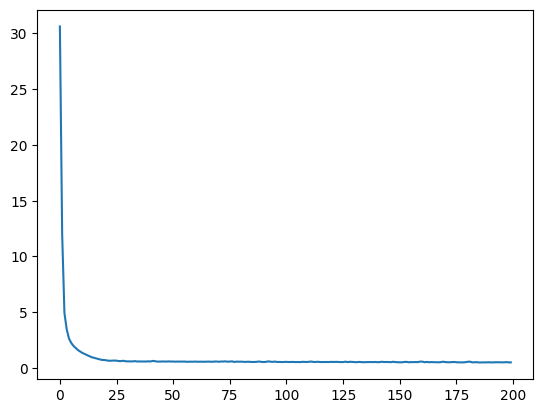

In [48]:
# dense 4개 추가

import pandas as pd
import tensorflow as tf
# 딥러닝을 구동하는 데 필요한 케라스 함수를 불러옵니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 데이터 로드
df = pd.read_csv('./data/diabetes.csv')
# 데이터 준비
X_train =df.drop(['Outcome'], axis=1)
y_train =df['Outcome']

# 모델 설정
model = Sequential()
model.add(Dense(12, input_shape=(8,), activation = 'relu')) # 제일 처음에는 입력이 어떤 방식인지 지정.(피처 수)
model.add(Dense(4, activation = 'relu')) # 새로운 덴스 층에 유닛은 뉴런을 몇개 둘것인지 설정
model.add(Dense(1,activation='sigmoid'))
# model.summary()
# 레이어가 증가할수록 빠른 속도로 증가. 시각화로 확인
# 머신러닝 딥러닝은 밸런스 포인트가 중요. 과적합 과소적합 우려.

# 딥러닝 설정
model.compile(loss='binary_crossentropy' , optimizer='adam', metrics=['Accuracy'])


# 모델을 실행 (딥러닝 훈련)
epoch_hist = model.fit(X_train, y_train, epochs=200)

# 평가
model.evaluate(X_train, y_train) # 로스, 정확도
# [0.5500941276550293, 0.7161458134651184]

# 시각화
plt.plot(epoch_hist.history['loss'])
plt.show()


In [36]:
# dense 4개 추가, epoch 500으로 증가

# 데이터 로드
df = pd.read_csv('./data/diabetes.csv')
# 데이터 준비
X_train =df.drop(['Outcome'], axis=1)
y_train =df['Outcome']

# 모델 설정
model = Sequential()
model.add(Dense(12, input_shape=(8,), activation = 'relu')) 
model.add(Dense(4, activation = 'relu')) 
model.add(Dense(1,activation='sigmoid'))
# model.summary()

# 딥러닝 설정
model.compile(loss='binary_crossentropy' , optimizer='adam', metrics=['Accuracy'])


# 모델을 실행 (딥러닝 훈련)
epoch_hist = model.fit(X_train, y_train, epochs=500)

# 평가
model.evaluate(X_train, y_train) # 로스, 정확도 # 0.7591145634651184

Epoch 1/500
24/24 [==============================] - 0s 826us/step - loss: 22.7747 - Accuracy: 0.3880
Epoch 2/500
24/24 [==============================] - 0s 739us/step - loss: 8.1640 - Accuracy: 0.5104
Epoch 3/500
24/24 [==============================] - 0s 826us/step - loss: 6.4387 - Accuracy: 0.4674
Epoch 4/500
24/24 [==============================] - 0s 848us/step - loss: 5.5441 - Accuracy: 0.4987
Epoch 5/500
24/24 [==============================] - 0s 739us/step - loss: 5.0006 - Accuracy: 0.5091
Epoch 6/500
24/24 [==============================] - 0s 783us/step - loss: 4.6048 - Accuracy: 0.5117
Epoch 7/500
24/24 [==============================] - 0s 761us/step - loss: 4.2273 - Accuracy: 0.5273
Epoch 8/500
24/24 [==============================] - 0s 826us/step - loss: 3.8706 - Accuracy: 0.5521
Epoch 9/500
24/24 [==============================] - 0s 870us/step - loss: 3.6229 - Accuracy: 0.5677
Epoch 10/500
24/24 [==============================] - 0s 935us/step - loss: 3.3201 - Accur

[0.47063255310058594, 0.7591145634651184]

In [37]:
# epoch 500으로 증가, dense 3개 추가로 변경했더니, 0.6510416865348816 정확도 감소
# 데이터 로드
df = pd.read_csv('./data/diabetes.csv')
# 데이터 준비
X_train =df.drop(['Outcome'], axis=1)
y_train =df['Outcome']

# 모델 설정
model = Sequential()
model.add(Dense(12, input_shape=(8,), activation = 'relu')) 
model.add(Dense(3, activation = 'relu')) 
model.add(Dense(1,activation='sigmoid'))
# model.summary()

# 딥러닝 설정
model.compile(loss='binary_crossentropy' , optimizer='adam', metrics=['Accuracy'])


# 모델을 실행 (딥러닝 훈련)
epoch_hist = model.fit(X_train, y_train, epochs=500)

# 평가
model.evaluate(X_train, y_train) # 로스, 정확도 # 0.7591145634651184

Epoch 1/500
24/24 [==============================] - 0s 783us/step - loss: 3.4569 - Accuracy: 0.5417
Epoch 2/500
24/24 [==============================] - 0s 761us/step - loss: 2.1902 - Accuracy: 0.5143
Epoch 3/500
24/24 [==============================] - 0s 826us/step - loss: 1.5197 - Accuracy: 0.4896
Epoch 4/500
24/24 [==============================] - 0s 848us/step - loss: 1.1536 - Accuracy: 0.4505
Epoch 5/500
24/24 [==============================] - 0s 826us/step - loss: 0.9561 - Accuracy: 0.4036
Epoch 6/500
24/24 [==============================] - 0s 804us/step - loss: 0.8565 - Accuracy: 0.3737
Epoch 7/500
24/24 [==============================] - 0s 783us/step - loss: 0.8063 - Accuracy: 0.6367
Epoch 8/500
24/24 [==============================] - 0s 826us/step - loss: 0.7684 - Accuracy: 0.6484
Epoch 9/500
24/24 [==============================] - 0s 804us/step - loss: 0.7474 - Accuracy: 0.6510
Epoch 10/500
24/24 [==============================] - 0s 870us/step - loss: 0.7321 - Accura

[0.6437245011329651, 0.6510416865348816]

In [38]:
#  epoch 500으로 증가, dense: unit 5개 추가했더니, 로스 줄고 정확도 증가

# 데이터 로드
df = pd.read_csv('./data/diabetes.csv')
# 데이터 준비
X_train =df.drop(['Outcome'], axis=1)
y_train =df['Outcome']

# 모델 설정
model = Sequential()
model.add(Dense(12, input_shape=(8,), activation = 'relu')) 
model.add(Dense(5, activation = 'relu')) 
model.add(Dense(1,activation='sigmoid'))
# model.summary()

# 딥러닝 설정
model.compile(loss='binary_crossentropy' , optimizer='adam', metrics=['Accuracy'])


# 모델을 실행 (딥러닝 훈련)
epoch_hist = model.fit(X_train, y_train, epochs=500)

# 평가
model.evaluate(X_train, y_train) # 로스, 정확도 # 0.7981770634651184

Epoch 1/500
24/24 [==============================] - 0s 804us/step - loss: 5.1130 - Accuracy: 0.6315
Epoch 2/500
24/24 [==============================] - 0s 978us/step - loss: 3.5713 - Accuracy: 0.6732
Epoch 3/500
24/24 [==============================] - 0s 826us/step - loss: 3.0716 - Accuracy: 0.6562
Epoch 4/500
24/24 [==============================] - 0s 913us/step - loss: 2.6741 - Accuracy: 0.6628
Epoch 5/500
24/24 [==============================] - 0s 891us/step - loss: 2.3023 - Accuracy: 0.6667
Epoch 6/500
24/24 [==============================] - 0s 957us/step - loss: 1.9808 - Accuracy: 0.6667
Epoch 7/500
24/24 [==============================] - 0s 848us/step - loss: 1.7006 - Accuracy: 0.6641
Epoch 8/500
24/24 [==============================] - 0s 826us/step - loss: 1.6540 - Accuracy: 0.6536
Epoch 9/500
24/24 [==============================] - 0s 1ms/step - loss: 1.3619 - Accuracy: 0.6732
Epoch 10/500
24/24 [==============================] - 0s 957us/step - loss: 1.3254 - Accuracy

[0.44588497281074524, 0.7981770634651184]

In [39]:
#  epoch 500으로 증가, dense 6개 추가했더니, 5개보다 낮다

# 데이터 로드
df = pd.read_csv('./data/diabetes.csv')
# 데이터 준비
X_train =df.drop(['Outcome'], axis=1)
y_train =df['Outcome']

# 모델 설정
model = Sequential()
model.add(Dense(12, input_shape=(8,), activation = 'relu')) 
model.add(Dense(5, activation = 'relu')) 
model.add(Dense(1,activation='sigmoid'))
# model.summary()

# 딥러닝 설정
model.compile(loss='binary_crossentropy' , optimizer='adam', metrics=['Accuracy'])


# 모델을 실행 (딥러닝 훈련)
epoch_hist = model.fit(X_train, y_train, epochs=500)

# 평가
model.evaluate(X_train, y_train) # 로스, 정확도 # 0.7981770634651184

Epoch 1/500
24/24 [==============================] - 0s 804us/step - loss: 30.8565 - Accuracy: 0.6510
Epoch 2/500
24/24 [==============================] - 0s 891us/step - loss: 18.2987 - Accuracy: 0.6432
Epoch 3/500
24/24 [==============================] - 0s 848us/step - loss: 11.8533 - Accuracy: 0.5716
Epoch 4/500
24/24 [==============================] - 0s 804us/step - loss: 8.9191 - Accuracy: 0.5625
Epoch 5/500
24/24 [==============================] - 0s 826us/step - loss: 6.0875 - Accuracy: 0.5443
Epoch 6/500
24/24 [==============================] - 0s 761us/step - loss: 3.9296 - Accuracy: 0.4935
Epoch 7/500
24/24 [==============================] - 0s 957us/step - loss: 2.6316 - Accuracy: 0.4935
Epoch 8/500
24/24 [==============================] - 0s 871us/step - loss: 1.8551 - Accuracy: 0.5026
Epoch 9/500
24/24 [==============================] - 0s 826us/step - loss: 1.4147 - Accuracy: 0.5625
Epoch 10/500
24/24 [==============================] - 0s 913us/step - loss: 1.2245 - Acc

[0.4792535603046417, 0.7786458134651184]

In [41]:
#  epoch 500으로 증가, dense 5개 추가에 또 덴스 추가했더니 오히려 역효과

# 데이터 로드
df = pd.read_csv('./data/diabetes.csv')
# 데이터 준비
X_train =df.drop(['Outcome'], axis=1)
y_train =df['Outcome']

# 모델 설정
model = Sequential()
model.add(Dense(12, input_shape=(8,), activation = 'relu')) 
model.add(Dense(5, activation = 'relu')) 
model.add(Dense(2, activation = 'relu')) 
model.add(Dense(1,activation='sigmoid'))
# model.summary()

# 딥러닝 설정
model.compile(loss='binary_crossentropy' , optimizer='adam', metrics=['Accuracy'])


# 모델을 실행 (딥러닝 훈련)
epoch_hist = model.fit(X_train, y_train, epochs=400)

# 평가
model.evaluate(X_train, y_train) # 로스, 정확도 # 0.6510416865348816

Epoch 1/400
24/24 [==============================] - 0s 826us/step - loss: 0.6916 - Accuracy: 0.6510
Epoch 2/400
24/24 [==============================] - 0s 804us/step - loss: 0.6885 - Accuracy: 0.6510
Epoch 3/400
24/24 [==============================] - 0s 783us/step - loss: 0.6855 - Accuracy: 0.6510
Epoch 4/400
24/24 [==============================] - 0s 891us/step - loss: 0.6828 - Accuracy: 0.6510
Epoch 5/400
24/24 [==============================] - 0s 826us/step - loss: 0.6801 - Accuracy: 0.6510
Epoch 6/400
24/24 [==============================] - 0s 891us/step - loss: 0.6777 - Accuracy: 0.6510
Epoch 7/400
24/24 [==============================] - 0s 870us/step - loss: 0.6754 - Accuracy: 0.6510
Epoch 8/400
24/24 [==============================] - 0s 826us/step - loss: 0.6733 - Accuracy: 0.6510
Epoch 9/400
24/24 [==============================] - 0s 848us/step - loss: 0.6714 - Accuracy: 0.6510
Epoch 10/400
24/24 [==============================] - 0s 826us/step - loss: 0.6695 - Accura

[0.6467993855476379, 0.6510416865348816]

In [42]:
#  덴스 16,4

# 데이터 로드
df = pd.read_csv('./data/diabetes.csv')
# 데이터 준비
X_train =df.drop(['Outcome'], axis=1)
y_train =df['Outcome']

# 모델 설정
model = Sequential()
model.add(Dense(16, input_shape=(8,), activation = 'relu')) 
model.add(Dense(4, activation = 'relu')) 
model.add(Dense(1,activation='sigmoid'))
# model.summary()

# 딥러닝 설정
model.compile(loss='binary_crossentropy' , optimizer='adam', metrics=['Accuracy'])


# 모델을 실행 (딥러닝 훈련)
epoch_hist = model.fit(X_train, y_train, epochs=500)

# 평가
model.evaluate(X_train, y_train) # 로스, 정확도 0.78125

Epoch 1/500
24/24 [==============================] - 0s 805us/step - loss: 14.0804 - Accuracy: 0.6419
Epoch 2/500
24/24 [==============================] - 0s 783us/step - loss: 7.5366 - Accuracy: 0.6276
Epoch 3/500
24/24 [==============================] - 0s 826us/step - loss: 3.5960 - Accuracy: 0.6016
Epoch 4/500
24/24 [==============================] - 0s 761us/step - loss: 2.7388 - Accuracy: 0.5846
Epoch 5/500
24/24 [==============================] - 0s 783us/step - loss: 2.2437 - Accuracy: 0.5924
Epoch 6/500
24/24 [==============================] - 0s 783us/step - loss: 2.0039 - Accuracy: 0.5951
Epoch 7/500
24/24 [==============================] - 0s 804us/step - loss: 1.7859 - Accuracy: 0.6107
Epoch 8/500
24/24 [==============================] - 0s 804us/step - loss: 1.6243 - Accuracy: 0.6172
Epoch 9/500
24/24 [==============================] - 0s 978us/step - loss: 1.5002 - Accuracy: 0.6276
Epoch 10/500
24/24 [==============================] - 0s 1ms/step - loss: 1.3989 - Accurac

[0.45686963200569153, 0.78125]

In [ ]:
# --------
#  epoch 500으로 증가, dense 5개 추가했더니, 로스 줄고 정확도 증가

# 데이터 로드
df = pd.read_csv('./data/diabetes.csv')
# 데이터 준비
X_train =df.drop(['Outcome'], axis=1)
y_train =df['Outcome']

# 모델 설정
model = Sequential()
model.add(Dense(12, input_shape=(8,), activation = 'relu')) 
model.add(Dense(5, activation = 'relu')) 
model.add(Dense(1,activation='sigmoid'))
# model.summary()

# 딥러닝 설정
model.compile(loss='binary_crossentropy' , optimizer='adam', metrics=['Accuracy'])


# 모델을 실행 (딥러닝 훈련)
epoch_hist = model.fit(X_train, y_train, epochs=500)

# 평가
model.evaluate(X_train, y_train) # 로스, 정확도 # 0.7981770634651184

In [43]:
# Adam변경 -> 역효과
# 데이터 로드
df = pd.read_csv('./data/diabetes.csv')
# 데이터 준비
X_train =df.drop(['Outcome'], axis=1)
y_train =df['Outcome']

# 모델 설정
model = Sequential()
model.add(Dense(12, input_shape=(8,), activation = 'relu')) 
model.add(Dense(5, activation = 'relu')) 
model.add(Dense(1,activation='sigmoid'))
# model.summary()

# 딥러닝 설정
model.compile(loss='binary_crossentropy' , optimizer=tf.keras.optimizers.Adam(0.5), metrics=['Accuracy'])
# 이진분류에서  오차를 어떻게 줄여갈것인가 loss='binary_crossentropy'

# 모델을 실행 (딥러닝 훈련)
epoch_hist = model.fit(X_train, y_train, epochs=500)

# 평가
model.evaluate(X_train, y_train) # 로스, 정확도 0.6510416865348816

Epoch 1/500
24/24 [==============================] - 0s 891us/step - loss: 21.6043 - Accuracy: 0.5859
Epoch 2/500
24/24 [==============================] - 0s 891us/step - loss: 0.6533 - Accuracy: 0.6510
Epoch 3/500
24/24 [==============================] - 0s 870us/step - loss: 0.6547 - Accuracy: 0.6510
Epoch 4/500
24/24 [==============================] - 0s 783us/step - loss: 0.6463 - Accuracy: 0.6510
Epoch 5/500
24/24 [==============================] - 0s 804us/step - loss: 0.6578 - Accuracy: 0.6510
Epoch 6/500
24/24 [==============================] - 0s 848us/step - loss: 0.6494 - Accuracy: 0.6510
Epoch 7/500
24/24 [==============================] - 0s 761us/step - loss: 0.6487 - Accuracy: 0.6510
Epoch 8/500
24/24 [==============================] - 0s 935us/step - loss: 0.6519 - Accuracy: 0.6510
Epoch 9/500
24/24 [==============================] - 0s 739us/step - loss: 0.6504 - Accuracy: 0.6510
Epoch 10/500
24/24 [==============================] - 0s 826us/step - loss: 0.6507 - Accur

[0.6505138874053955, 0.6510416865348816]

In [ ]:
#  epoch 500으로 증가, dense 5개 추가했더니, 기존에 비해 loss 줄고 정확도 증가

# 데이터 로드
df = pd.read_csv('./data/diabetes.csv')
# 데이터 준비
X_train =df.drop(['Outcome'], axis=1)
y_train =df['Outcome']

# 모델 설정
model = Sequential()
model.add(Dense(12, input_shape=(8,), activation = 'relu')) 
model.add(Dense(5, activation = 'relu')) 
model.add(Dense(1,activation='sigmoid'))

# 딥러닝 설정
model.compile(loss='binary_crossentropy' , optimizer='adam', metrics=['Accuracy'])

# 딥러닝 훈련 (모델 실행)
epoch_hist = model.fit(X_train, y_train, epochs=500)

# 평가
model.evaluate(X_train, y_train) # 로스, 정확도 # 0.7981770634651184

In [44]:
# 데이터 로드
df = pd.read_csv('./data/diabetes.csv')
# 데이터 준비
X_train =df.drop(['Outcome'], axis=1)
y_train =df['Outcome']

# 모델 설정
model = Sequential()
model.add(Dense(12, input_shape=(8,), activation = 'relu')) 
model.add(Dense(5, activation = 'relu')) 
model.add(Dense(1,activation='sigmoid'))

# 딥러닝 설정
model.compile(loss='binary_crossentropy' , optimizer='adam', metrics=['Accuracy'])

# 딥러닝 훈련 (모델 실행)
epoch_hist = model.fit(X_train, y_train, epochs=500)

# 평가
model.evaluate(X_train, y_train) 

Epoch 1/500
24/24 [==============================] - 0s 848us/step - loss: 10.1936 - Accuracy: 0.4414
Epoch 2/500
24/24 [==============================] - 0s 783us/step - loss: 7.3763 - Accuracy: 0.5651
Epoch 3/500
24/24 [==============================] - 0s 935us/step - loss: 5.4722 - Accuracy: 0.5872
Epoch 4/500
24/24 [==============================] - 0s 848us/step - loss: 4.1468 - Accuracy: 0.6185
Epoch 5/500
24/24 [==============================] - 0s 848us/step - loss: 3.2282 - Accuracy: 0.6302
Epoch 6/500
24/24 [==============================] - 0s 848us/step - loss: 2.5695 - Accuracy: 0.6419
Epoch 7/500
24/24 [==============================] - 0s 848us/step - loss: 2.0329 - Accuracy: 0.6471
Epoch 8/500
24/24 [==============================] - 0s 935us/step - loss: 1.6738 - Accuracy: 0.6445
Epoch 9/500
24/24 [==============================] - 0s 891us/step - loss: 1.4163 - Accuracy: 0.6471
Epoch 10/500
24/24 [==============================] - 0s 1ms/step - loss: 1.2191 - Accurac

[0.640245258808136, 0.6588541865348816]

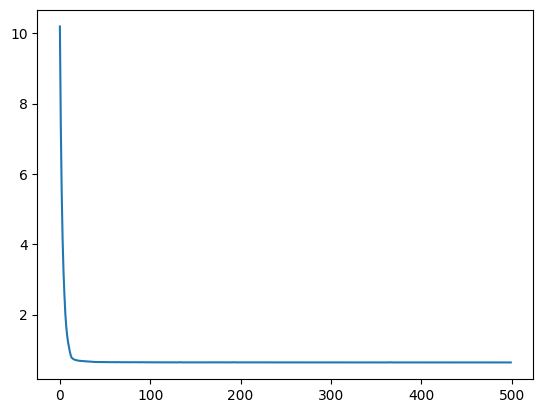

In [45]:
import matplotlib.pyplot as plt
plt.plot(epoch_hist.history['loss'])
plt.show()

Epoch 1/350
24/24 [==============================] - 0s 805us/step - loss: 8.5092 - Accuracy: 0.6432
Epoch 2/350
24/24 [==============================] - 0s 761us/step - loss: 3.2259 - Accuracy: 0.4688
Epoch 3/350
24/24 [==============================] - 0s 761us/step - loss: 1.0944 - Accuracy: 0.3607
Epoch 4/350
24/24 [==============================] - 0s 783us/step - loss: 0.7361 - Accuracy: 0.3568
Epoch 5/350
24/24 [==============================] - 0s 804us/step - loss: 0.7150 - Accuracy: 0.3607
Epoch 6/350
24/24 [==============================] - 0s 718us/step - loss: 0.7011 - Accuracy: 0.5768
Epoch 7/350
24/24 [==============================] - 0s 870us/step - loss: 0.7006 - Accuracy: 0.6497
Epoch 8/350
24/24 [==============================] - 0s 761us/step - loss: 0.7131 - Accuracy: 0.6549
Epoch 9/350
24/24 [==============================] - 0s 848us/step - loss: 0.6980 - Accuracy: 0.6523
Epoch 10/350
24/24 [==============================] - 0s 783us/step - loss: 0.6901 - Accura

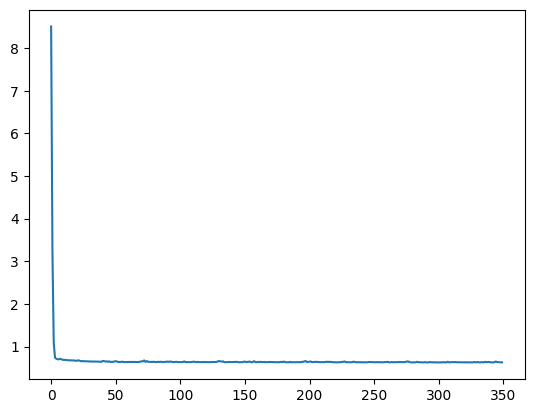

In [46]:
# 데이터 로드
df = pd.read_csv('./data/diabetes.csv')
# 데이터 준비
X_train =df.drop(['Outcome'], axis=1)
y_train =df['Outcome']

# 모델 설정
model = Sequential()
model.add(Dense(12, input_shape=(8,), activation = 'relu')) 
model.add(Dense(5, activation = 'relu')) 
model.add(Dense(1,activation='sigmoid'))

# 딥러닝 설정
model.compile(loss='binary_crossentropy' , optimizer='adam', metrics=['Accuracy'])

# 딥러닝 훈련 (모델 실행)
epoch_hist = model.fit(X_train, y_train, epochs=350)

# 평가
model.evaluate(X_train, y_train) 

# 시각화
plt.plot(epoch_hist.history['loss'])
plt.show()

정확도 81코드

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

df=pd.read_csv('./data/diabetes.csv')
X_train= df.drop(['Outcome'],axis=1)
y_train = df['Outcome']
# type(X_train),type(y_train)

model = Sequential()
model.add(Dense(units=12,input_shape=(8,),activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
# model.summary()

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['Accuracy'])
epoch_hist=model.fit(X_train,y_train,epochs=200)
model.evaluate(X_train,y_train)
# plt.plot(epoch_hist.history['loss'])
# plt.show()

Epoch 1/200
24/24 [==============================] - 0s 826us/step - loss: 1.1265 - Accuracy: 0.5898
Epoch 2/200
24/24 [==============================] - 0s 870us/step - loss: 0.8876 - Accuracy: 0.6224
Epoch 3/200
24/24 [==============================] - 0s 805us/step - loss: 0.7751 - Accuracy: 0.6289
Epoch 4/200
24/24 [==============================] - 0s 870us/step - loss: 0.7124 - Accuracy: 0.6523
Epoch 5/200
24/24 [==============================] - 0s 848us/step - loss: 0.6942 - Accuracy: 0.6328
Epoch 6/200
24/24 [==============================] - 0s 891us/step - loss: 0.6714 - Accuracy: 0.6523
Epoch 7/200
24/24 [==============================] - 0s 957us/step - loss: 0.6566 - Accuracy: 0.6758
Epoch 8/200
24/24 [==============================] - 0s 848us/step - loss: 0.6484 - Accuracy: 0.6680
Epoch 9/200
24/24 [==============================] - 0s 935us/step - loss: 0.6470 - Accuracy: 0.6732
Epoch 10/200
24/24 [==============================] - 0s 826us/step - loss: 0.6413 - Accura

[0.4605793058872223, 0.7838541865348816]